In [9]:
import cv2
import numpy as np
from scipy import ndimage
import scipy
from scipy import ndimage
import imageio
import time
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from numpy import array, zeros, abs, sqrt, arctan2, arctan, pi, real
from numpy.fft import fft2, ifft2
from pynq.overlays.base import BaseOverlay
from pynq.lib.video import *
# base = BaseOverlay("base.bit")
import numpy as np 
import cv2
import time
from pynq import Overlay
import pynq.lib.dma
from pynq import allocate
import random
import matplotlib.pyplot as plt
import time

OVERLAY = './canny_dma.bit'

In [ ]:
# Mode = VideoMode(640,480,24)
# hdmi_out = base.video.hdmi_out
# hdmi_out.configure(Mode,PIXEL_BGR)
# hdmi_out.start()




In [10]:
# camera (input) configuration
frame_in_w = 640
frame_in_h = 480
videoIn = cv2.VideoCapture(0)
videoIn.set(cv2.CAP_PROP_FRAME_WIDTH, frame_in_w);
videoIn.set(cv2.CAP_PROP_FRAME_HEIGHT, frame_in_h);
check, frame = videoIn.read()


In [12]:
def to_shape(a, shape):
    b = np.zeros(shape)
    b[:a.shape[0], :a.shape[1]] = a
    return b


# non max suppression from https://github.com/fatihsennik/OpenCV-Canny-Edge-Detection/tree/master/code bc no existing function in opencv/scipy
def nonmax_suppression(det, phase):
    gmax = zeros(det.shape)
    for i in range(gmax.shape[0]):
        for j in range(gmax.shape[1]):
            if phase[i][j] < 0:
                phase[i][j] += 360

            if ((j + 1) < gmax.shape[1]) and ((j - 1) >= 0) and ((i + 1) < gmax.shape[0]) and ((i - 1) >= 0):
                # 0 degrees
                if (phase[i][j] >= 337.5 or phase[i][j] < 22.5) or (phase[i][j] >= 157.5 and phase[i][j] < 202.5):
                    if det[i][j] >= det[i][j + 1] and det[i][j] >= det[i][j - 1]:
                        gmax[i][j] = det[i][j]
                # 45 degrees
                if (phase[i][j] >= 22.5 and phase[i][j] < 67.5) or (phase[i][j] >= 202.5 and phase[i][j] < 247.5):
                    if det[i][j] >= det[i - 1][j + 1] and det[i][j] >= det[i + 1][j - 1]:
                        gmax[i][j] = det[i][j]
                # 90 degrees
                if (phase[i][j] >= 67.5 and phase[i][j] < 112.5) or (phase[i][j] >= 247.5 and phase[i][j] < 292.5):
                    if det[i][j] >= det[i - 1][j] and det[i][j] >= det[i + 1][j]:
                        gmax[i][j] = det[i][j]
                # 135 degrees
                if (phase[i][j] >= 112.5 and phase[i][j] < 157.5) or (phase[i][j] >= 292.5 and phase[i][j] < 337.5):
                    if det[i][j] >= det[i - 1][j - 1] and det[i][j] >= det[i + 1][j + 1]:
                        gmax[i][j] = det[i][j]
    return gmax
from scipy import signal
def nonmax_suppression_conv(det, phase):
    kernel = { 
        'up': [[0,-1,0],[0,1,0],[0,0,0]],
        'down': [[0,0,0],[0,1,0],[0,-1,0]],
        'left': [[0,0,0],[-1,1,0],[0,0,0]],
        'right': [[0,0,0],[0,1,-1],[0,0,0]],
        'up_left': [[-1,0,0],[0,1,0],[0,0,0]],
        'down_left': [[0,0,0],[0,1,0],[-1,0,0]],
        'up_right': [[0,0,-1],[0,1,0],[0,0,0]],
        'down_right': [[0,0,0],[0,1,0],[0,0,-1]],
    }

    phase[ phase < 0 ] += 360

    output = np.zeros(phase.shape)
    print(phase.shape)

    output = np.logical_and ( np.greater(signal.convolve2d(det, kernel['left'],mode='same'), 0), np.greater(scipy.signal.convolve2d(det, kernel['right'],mode='same'), 0), where=(phase >= 337.5) | (phase < 22.5) | ((phase >= 157.5) & (phase < 202.5))) \
    | np.logical_and ( np.greater(signal.convolve2d(det, kernel['down_left'],mode='same'), 0), np.greater(scipy.signal.convolve2d(det, kernel['up_right'],mode='same'), 0), where=((phase >= 22.5) & (phase < 67.5)) | ((phase >= 202.5) & (phase < 247.5))) \
    | np.logical_and ( np.greater(signal.convolve2d(det, kernel['up'],mode='same'), 0), np.greater(scipy.signal.convolve2d(det, kernel['down'],mode='same'), 0), where=((phase >= 67.5) & (phase < 112.5)) | ((phase >= 247.5) & (phase < 292.5))) \
    | np.logical_and ( np.greater(signal.convolve2d(det, kernel['up_left'],mode='same'), 0), np.greater(scipy.signal.convolve2d(det, kernel['down_right'],mode='same'), 0), where=((phase >= 112.5) & (phase < 157.5)) | ((phase >= 292.5) & (phase < 337.5)))

    return np.where(output, det, 0)

capture device is open: True
(480, 640)
0.0011162757873535156


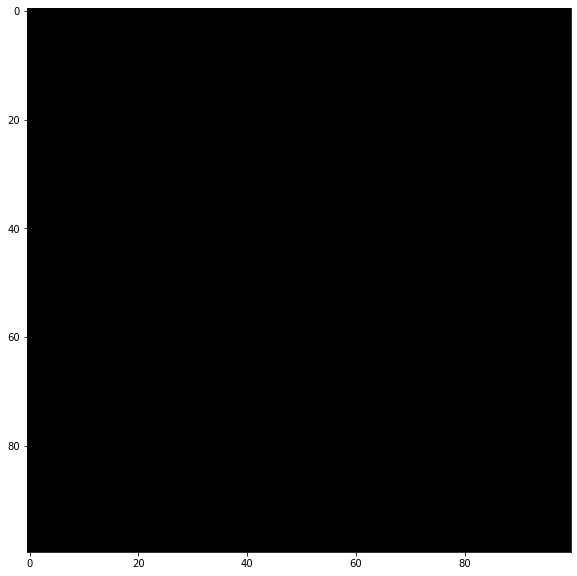

(480, 640)
0.0009462833404541016


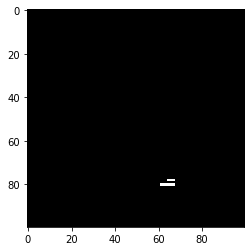

(480, 640)
0.0010061264038085938


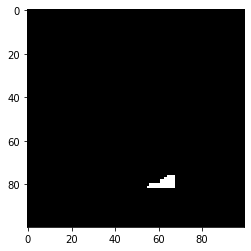

(480, 640)
0.0010538101196289062


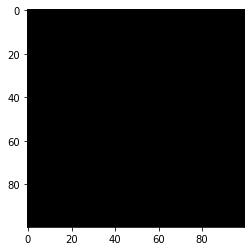

(480, 640)
0.0009324550628662109


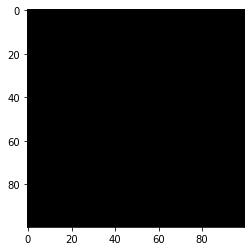

(480, 640)
0.0010504722595214844


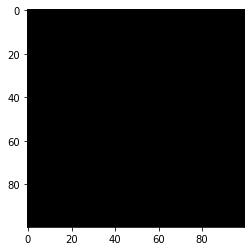

(480, 640)
0.0010340213775634766


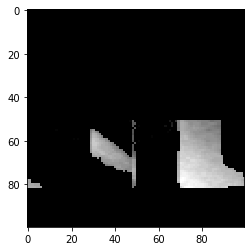

(480, 640)
0.0010197162628173828


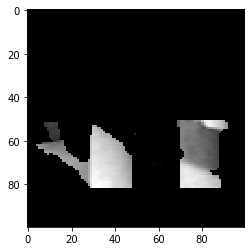

(480, 640)
0.0011322498321533203


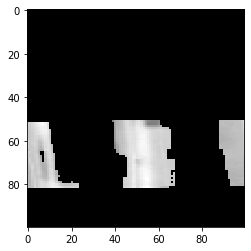

(480, 640)
0.0010764598846435547


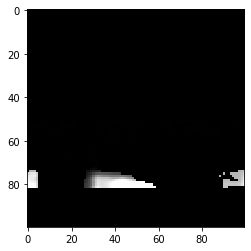

(480, 640)
0.0012018680572509766


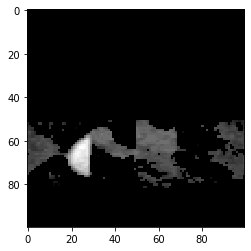

(480, 640)


KeyboardInterrupt: 

In [20]:
videoIn = cv2.VideoCapture(0)
videoIn.set(cv2.CAP_PROP_FRAME_WIDTH, frame_in_w);
videoIn.set(cv2.CAP_PROP_FRAME_HEIGHT, frame_in_h);
print("capture device is open: " + str(videoIn.isOpened()))
 
# Infinite while loop to treat stack of image as video
# plt.ion()

fig = plt.figure(1, figsize=(10, 10))
ax = fig.add_subplot()
# check, frame = videoIn.read()
# im1 = ax.imshow(frame)
# plt.show()
while True:
#     check, frame = video.read()
    check, frame = videoIn.read()
    
    if (not check):
        print(check)
        raise RuntimeError("Error while reading from camera.")
    
    # im = scipy.signal.medfilt2d(im)
    # im = skimage.filters.gaussian(im, sigma=(sigma, sigma), multichannel=True)


    # #sobel operator
    # # Reading frame(image) from video
    # im = frame.astype('int32')
    # # im = frame.astype('int32')
    # dx = ndimage.sobel(im, 0) # horizontal deriv
    # dy = ndimage.sobel(im, 1) # vertical deriv
    # mag = np.hypot(dx, dy) # magnitude
    # mag *= 255.0/np.max(mag) #normalize

    ###############################################
    # Morphological edge out
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    threshold = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)[1]
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
    dilate = cv2.morphologyEx(threshold, cv2.MORPH_DILATE, kernel)
    morph = cv2.absdiff(dilate, threshold)   
    ###############################################



    ###############################################
    # Canny Edge Detection        
    # cv2.Canny(frame_webcam, 100, 110, edges=outframe)
    canny = cv2.Canny(frame, 100, 110)
    ###############################################


    # noise reduction using median blur
    sigma = 7
    # frame2 = cv2.medianBlur(frame, sigma)
    frame2 = cv2.GaussianBlur(frame, (sigma,sigma), 0)
    im = frame2.astype('int32')
    ###############################################
    # Sobel Edge Detection
    # define filters
    horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  # s2
    vertical = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])  # s1
    gray_img = np.round(0.299 * im[:, :, 0] +
                    0.587 * im[:, :, 1] +
                    0.114 * im[:, :, 2]).astype(np.uint8)

    img_fft = np.fft.fft2(gray_img)
    horizontal_kernel_fft =  np.fft.fft2(to_shape(horizontal, gray_img.shape))
    vertical_kernel_fft =  np.fft.fft2(to_shape(vertical, gray_img.shape) )


    newverticalImage = real(np.fft.ifft2( img_fft * vertical_kernel_fft )).astype(float)
    newhorizontalImage = real(np.fft.ifft2( img_fft * horizontal_kernel_fft )).astype(float)

    

    sobel_fft = abs( np.sqrt(pow(newverticalImage, 2) + pow(newhorizontalImage, 2)) ).astype(float)
    angle = arctan2(newverticalImage, newhorizontalImage) * 180 / pi
       
    sobel_fft[sobel_fft<max(sobel_fft.flatten())*.05] = 0
    sobel_non_max = nonmax_suppression_conv(sobel_fft, angle)


    # sobel_fft = sobel_fft.astype(np.uint8)

    # sobel_fft = cv2.adaptiveThreshold(sobel_fft,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    #                                 cv2.THRESH_BINARY_INV,7,10)
 

    ###############################################



    ###############################################
    # Prewitt Edge Detection
    # define filters
    horizontal = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])  # s2
    vertical = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])  # s1
    gray_img = np.round(0.299 * im[:, :, 0] +
                    0.587 * im[:, :, 1] +
                    0.114 * im[:, :, 2]).astype(np.uint8)

    img_fft = np.fft.fft2(gray_img)
    horizontal_kernel_fft =  np.fft.fft2(to_shape(horizontal, gray_img.shape))
    vertical_kernel_fft =  np.fft.fft2(to_shape(vertical, gray_img.shape) )


    newverticalImage = real(np.fft.ifft2( img_fft * vertical_kernel_fft )).astype(float)
    newhorizontalImage = real(np.fft.ifft2( img_fft * horizontal_kernel_fft )).astype(float)


    prewitt_fft = abs( np.sqrt(pow(newverticalImage, 2) + pow(newhorizontalImage, 2)) ).astype(float)
    angle = arctan2(newverticalImage, newhorizontalImage) * 180 / pi
    # prewitt_fft = nonmax_suppression(prewitt_fft, angle)

    
    prewitt_fft = prewitt_fft.astype(np.uint8)

    # prewitt_fft = cv2.adaptiveThreshold(prewitt_fft,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    #                                 cv2.THRESH_BINARY_INV,7,10)
    
    # prewitt_fft = 255-prewitt_fft
    prewitt_fft[prewitt_fft<max(prewitt_fft.flatten())*.1] = 0
    ###############################################


    ###############################################
    # Laplachian Edge Detection
    # define filters
    horizontal = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]) #positive laplachian
    # horizontal = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]]) #negative laplachian
    vertical = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]) 
    gray_img = np.round(0.299 * im[:, :, 0] +
                    0.587 * im[:, :, 1] +
                    0.114 * im[:, :, 2]).astype(np.uint8)

    img_fft = np.fft.fft2(gray_img)
    horizontal_kernel_fft =  np.fft.fft2(to_shape(horizontal, gray_img.shape))
    vertical_kernel_fft =  np.fft.fft2(to_shape(vertical, gray_img.shape) )


    newverticalImage = real(np.fft.ifft2( img_fft * vertical_kernel_fft )).astype(float)
    newhorizontalImage = real(np.fft.ifft2( img_fft * horizontal_kernel_fft )).astype(float)


    laplachian_fft = abs( np.sqrt(pow(newverticalImage, 2) + pow(newhorizontalImage, 2)) ).astype(float)
    angle = arctan2(newverticalImage, newhorizontalImage) * 180 / pi
    # laplachian_fft = nonmax_suppression(laplachian_fft, angle)

    
    laplachian_fft = laplachian_fft.astype(np.uint8)

    # laplachian_fft = cv2.adaptiveThreshold(laplachian_fft,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    #                                 cv2.THRESH_BINARY_INV,7,10)
    
    # laplachian_fft = 255-prewitt_fft
    laplachian_fft[laplachian_fft<max(laplachian_fft.flatten())*.007] = 0
    ###############################################
    
    ol = Overlay(OVERLAY)
    dma = ol.axi_dma_0

    in_buffer = allocate(shape=(100,100), dtype=np.uint8)
    out_buffer = allocate(shape=(100,100), dtype=np.uint8)
    #CREATE CONTIGOUS MEMORY ALLOCATED BUFFERS THROUGH XLNK
    
    from pynq import MMIO
    ip = MMIO(0x43C00000,0x10000)
    ip.write(0x10 , 150 % 256)
    ip.write(0x18,100 % 256)
    ip.read(0x10)
    ip.read(0x18)
    #SET THE REGISTER'S VALUES OF HYSTHERESIS 
    
    dma.sendchannel.start()
    dma.recvchannel.start()
    #START THE DMA
    
    img = frame
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    np.copyto(in_buffer,img[:100,:100])
    time.sleep(1)
    t = time.time()

    dma.sendchannel.transfer(in_buffer)
    dma.sendchannel.start()
    dma.recvchannel.start()
    dma.recvchannel.transfer(out_buffer)

    print(time.time() - t)
    #EXECUTE THE TRANSFER FROM PS --> PL AND PL --> PS
    
    plt.imshow(out_buffer, cmap='gray')

#     cv2.imshow("canny edge detection", canny)

    
#     cv2.imshow("normal frame", frame)
#     cv2.imshow("edge detection sobel", sobel_fft)
#     cv2.imshow("sobel non max", sobel_non_max)
    #cv2.imshow("edge detection prewitt", prewitt_fft)
   # cv2.imshow("edge detection laplachian", laplachian_fft)
    #cv2.imshow("edge detection sobel and laplachian", laplachian_fft)

   # cv2.imshow("morphological edge out", morph)
    frame_vga = np.zeros((480,640,3)).astype(np.uint8)
    frame_vga[:,:,0] = sobel_fft
    frame_vga[:,:,1] = sobel_fft
    frame_vga[:,:,2] = sobel_fft
    
#     im1.set_data(frame_vga)
    plt.imshow(frame_vga)
    plt.show()
        
    key = cv2.waitKey(1)
    if key == ord('q'):
        break
video.release()


In [ ]:
import numpy as np 
import cv2
import time
from pynq import Overlay
import pynq.lib.dma
from pynq import allocate
import random
import matplotlib.pyplot as plt
import time

OVERLAY = 'PYNQ-Z2-IMPROC/IP/canny_dma.bit'

In [ ]:
ol = Overlay(OVERLAY)
dma = ol.axi_dma_0

in_buffer = allocate(shape=(100,100), dtype=np.uint8)
out_buffer = allocate(shape=(100,100), dtype=np.uint8)
#CREATE CONTIGOUS MEMORY ALLOCATED BUFFERS THROUGH XLNK

In [ ]:
from pynq import MMIO
ip = MMIO(0x43C00000,0x10000)
ip.write(0x10 , 150 % 256)
ip.write(0x18,100 % 256)
ip.read(0x10)
ip.read(0x18)
#SET THE REGISTER'S VALUES OF HYSTHERESIS 

In [ ]:
dma.sendchannel.start()
dma.recvchannel.start()
#START THE DMA

In [ ]:
img = cv2.imread('./small.jpg', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
np.copyto(in_buffer,img)
time.sleep(1)
t = time.time()

dma.sendchannel.transfer(in_buffer)
dma.sendchannel.start()
dma.recvchannel.start()
dma.recvchannel.transfer(out_buffer)

print(time.time() - t)
#EXECUTE THE TRANSFER FROM PS --> PL AND PL --> PS

In [ ]:
plt.imshow(out_buffer, cmap='gray')